# Prosjektoppgave MET2010

## Innholdsfotegnelse
1. Innledning
2. Datainnhenting og strukturering
3. 
4. 
5. 
6. 
7. Kilder
8. Ordtelling

## 1. Innledning

I denne prosjektoppgaven vil jeg ta for meg data omhandlende vær, stråling og forurensing i Trondheim, dette for å se en sammenheng mellom disse og også kunne predikere når det er høyest andel av svevestøv. 

## 2. Datainnhenting

Starter med å importere de relevante pakkene, for deretter å innhente værdata fra Metrologisk institutt. Målingene er gjort på Voll målestasjon i Trondheim. https://www.fhi.no/nettpub/luftkvalitet/temakapitler/svevestov/

In [527]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [528]:
weather = pd.read_csv("data/Temperatur_regn.csv", sep=";", decimal=",")

In [529]:
weather.tail()

Navn  Stasjon  \
2553                                   Trondheim - Voll  SN68860   
2554                                   Trondheim - Voll  SN68860   
2555                                   Trondheim - Voll  SN68860   
2556                                   Trondheim - Voll  SN68860   
2557  Data er gyldig per 16.11.2022 (CC BY 4.0), Met...      NaN   

     Tid(norsk normaltid)  Maksimumstemperatur (døgn)  \
2553           28.12.2021                        -4.5   
2554           29.12.2021                        -4.5   
2555           30.12.2021                        -0.4   
2556           31.12.2021                         2.4   
2557                  NaN                         NaN   

      Minimumstemperatur (døgn) Høyeste middelvind (døgn)  Nedbør (døgn)  
2553                      -10.1                       1,6            0.0  
2554                       -9.7                       2,4            0.0  
2555                       -6.5                       2,9            0.0  
2556                       -1.9                       4,8            3.2  
2557                        NaN                       NaN            NaN

In [530]:
weather.drop(weather.tail(1).index,inplace=True)

In [531]:
weather.rename(columns={"Tid(norsk normaltid)" : "Tid"}, inplace=True)
weather.rename(columns={"Maksimumstemperatur (døgn)" : "Max_Temp"}, inplace=True)
weather.rename(columns={"Minimumstemperatur (døgn)" : "Min_Temp"}, inplace=True)
weather.rename(columns={"Høyeste middelvind (døgn)" : "Max_Wind"}, inplace=True)
weather.rename(columns={"Nedbør (døgn)" : "Rain"}, inplace=True)

In [532]:
weather.set_index("Tid", inplace=True)
weather.index = pd.to_datetime(weather.index, format="%d.%m.%Y").date

In [533]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2557 entries, 2015-01-01 to 2021-12-31
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Navn      2557 non-null   object 
 1   Stasjon   2557 non-null   object 
 2   Max_Temp  2557 non-null   float64
 3   Min_Temp  2557 non-null   float64
 4   Max_Wind  2557 non-null   object 
 5   Rain      2557 non-null   float64
dtypes: float64(3), object(3)
memory usage: 139.8+ KB


In [534]:
weather["Is_Rain"] = np.where(weather.Rain>0, 1, 0)

In [535]:
weather["Max_Wind"] = weather.Max_Wind.str.replace(',','.')
weather["Max_Wind"] = weather.Max_Wind.str.replace('-','0')


In [536]:
weather["Max_Wind"] = weather.Max_Wind.astype("float64")

In [537]:
uv = pd.read_table("https://raw.githubusercontent.com/uvnrpa/Daily_Doses/master/TRH_daily.txt", skiprows=31)

In [538]:
length_period = len(weather)

In [539]:
uv = uv.tail(length_period)

In [540]:
weather["UVA"] = uv["UVA"].to_numpy()
weather["UVB"] = uv["UVB"].to_numpy()

In [541]:
weather.tail()

Navn  Stasjon  Max_Temp  Min_Temp  Max_Wind  Rain  \
2021-12-27  Trondheim - Voll  SN68860       0.2      -7.3       4.2   1.2   
2021-12-28  Trondheim - Voll  SN68860      -4.5     -10.1       1.6   0.0   
2021-12-29  Trondheim - Voll  SN68860      -4.5      -9.7       2.4   0.0   
2021-12-30  Trondheim - Voll  SN68860      -0.4      -6.5       2.9   0.0   
2021-12-31  Trondheim - Voll  SN68860       2.4      -1.9       4.8   3.2   

            Is_Rain      UVA     UVB  
2021-12-27        1  24021.0  57.144  
2021-12-28        0  23988.0  46.431  
2021-12-29        0  19061.0  32.673  
2021-12-30        0  24308.0  30.534  
2021-12-31        1  17993.0  19.491

In [542]:
weather = weather.drop("Stasjon", axis=1)

In [543]:
pressure = pd.read_csv("data/Lufttrykk.csv", sep=";", decimal=",")
pressure.drop(pressure.tail(1).index,inplace=True)

In [544]:
pressure.columns

Index(['Navn', 'Stasjon', 'Tid(norsk normaltid)',
       'Høyeste lufttrykk i havnivå (døgn)',
       'Laveste lufttrykk i havnivå (døgn)'],
      dtype='object')

In [545]:
weather["Max_Pressure"] = pressure["Høyeste lufttrykk i havnivå (døgn)"].to_numpy()
weather["Min_Pressure"] = pressure["Laveste lufttrykk i havnivå (døgn)"].to_numpy()

In [546]:
weather.tail()

Navn  Max_Temp  Min_Temp  Max_Wind  Rain  Is_Rain  \
2021-12-27  Trondheim - Voll       0.2      -7.3       4.2   1.2        1   
2021-12-28  Trondheim - Voll      -4.5     -10.1       1.6   0.0        0   
2021-12-29  Trondheim - Voll      -4.5      -9.7       2.4   0.0        0   
2021-12-30  Trondheim - Voll      -0.4      -6.5       2.9   0.0        0   
2021-12-31  Trondheim - Voll       2.4      -1.9       4.8   3.2        1   

                UVA     UVB  Max_Pressure  Min_Pressure  
2021-12-27  24021.0  57.144        1007.9        1002.2  
2021-12-28  23988.0  46.431        1001.6         998.7  
2021-12-29  19061.0  32.673        1000.6         996.8  
2021-12-30  24308.0  30.534         996.4         987.3  
2021-12-31  17993.0  19.491        1009.9         995.1

In [547]:
pollution = pd.read_csv("data/luftkvalitet.csv", skiprows=3)

In [548]:
pollution.isna().sum()

Tid                                   0
E6-Tiller PM10 µg/m³ Day            330
Dekning                               1
E6-Tiller PM2.5 µg/m³ Day           330
Dekning.1                             1
Elgeseter PM10 µg/m³ Day            132
Dekning.2                             1
Elgeseter PM2.5 µg/m³ Day           132
Dekning.3                             1
Elgeseter mobil PM10 µg/m³ Day     2514
Dekning.4                          2513
Elgeseter mobil PM2.5 µg/m³ Day    2514
Dekning.5                          2513
Omkjøringsvegen PM10 µg/m³ Day     1871
Dekning.6                          1427
Omkjøringsvegen PM2.5 µg/m³ Day    1892
Dekning.7                          1427
Torvet PM10 µg/m³ Day               268
Dekning.8                            35
Torvet PM2.5 µg/m³ Day              272
Dekning.9                            34
Åsveien skole PM10 µg/m³ Day       2121
Dekning.10                         2113
Åsveien skole PM2.5 µg/m³ Day      2121
Dekning.11                         2113


Velger å bruke målestasjonen i Elgeseter ettersom denne har færrest NaN-verdier, i tillegg til at det er den det er mest relevant å se på som følge av sin nærhet til Adolf Øien bygget. Grunnen til disse NaN-verdiene kan være manglende dekningen på målestasjonene. For å få fullstendige data velger jeg å fylle disse verdiene med målinger fra andre stasjoner i nærheten, jeg velger hovedsaklig de med likest lokasjon og omgivelser og unnlater å ta med målinger ved E6. De verdiene som fremdeles manglet etter dette fylte jeg først ved å ta snittet av den forrige og den neste verdien, dette vil føre til et någenlunde greit estimat for de fem dagene det gjelder. Til slutt fyllte jeg den siste verdien med den nest siste. 

In [549]:
pollution['Elgeseter PM10 µg/m³ Day'].fillna(pollution['Torvet PM10 µg/m³ Day'], inplace=True)
print(pollution["Elgeseter PM10 µg/m³ Day"].isna().sum())
pollution['Elgeseter PM10 µg/m³ Day'].fillna(pollution['Bakke kirke PM10 µg/m³ Day'], inplace=True)
print(pollution["Elgeseter PM10 µg/m³ Day"].isna().sum())
pollution['Elgeseter PM10 µg/m³ Day'].fillna(pollution['Åsveien skole PM10 µg/m³ Day'], inplace=True)
print(pollution["Elgeseter PM10 µg/m³ Day"].isna().sum())
pollution["Elgeseter PM10 µg/m³ Day"] = (pollution["Elgeseter PM10 µg/m³ Day"].ffill()+pollution["Elgeseter PM10 µg/m³ Day"].bfill())/2
print(pollution["Elgeseter PM10 µg/m³ Day"].isna().sum())
pollution["Elgeseter PM10 µg/m³ Day"].ffill(inplace=True)
print(pollution["Elgeseter PM10 µg/m³ Day"].isna().sum())

27
13
6
1
0


In [550]:
pollution['Elgeseter PM2.5 µg/m³ Day'].fillna(pollution['Torvet PM2.5 µg/m³ Day'], inplace=True)
pollution['Elgeseter PM2.5 µg/m³ Day'].fillna(pollution['Bakke kirke PM2.5 µg/m³ Day'], inplace=True)
pollution['Elgeseter PM2.5 µg/m³ Day'].fillna(pollution['Åsveien skole PM2.5 µg/m³ Day'], inplace=True)
pollution["Elgeseter PM2.5 µg/m³ Day"] = (pollution["Elgeseter PM2.5 µg/m³ Day"].ffill()+pollution["Elgeseter PM2.5 µg/m³ Day"].bfill())/2
pollution["Elgeseter PM2.5 µg/m³ Day"].ffill(inplace=True)
print(pollution["Elgeseter PM2.5 µg/m³ Day"].isna().sum())

0


In [551]:
weather["Pollution_PM25"] = pollution["Elgeseter PM2.5 µg/m³ Day"].to_numpy()
weather["Pollution_PM10"] = pollution["Elgeseter PM10 µg/m³ Day"].to_numpy()

In [552]:
power2015 = pd.read_csv("data/poweruse_2015.csv")
power2016 = pd.read_csv("data/poweruse_2016.csv")
power2017 = pd.read_csv("data/poweruse_2017.csv")
power2018 = pd.read_csv("data/poweruse_2018.csv")
power2019 = pd.read_csv("data/poweruse_2019.csv")
power2020 = pd.read_csv("data/poweruse_2020.csv")
power2021 = pd.read_csv("data/poweruse_2021.csv")

In [553]:
power_list = [power2015, power2016, power2017, power2018, power2019, power2020, power2021]

In [554]:
daily_power = pd.DataFrame()
daily_power = pd.concat(power_list, ignore_index=True)

In [555]:
daily_power.drop(daily_power.head(3).index,inplace=True)
daily_power.drop(daily_power.tail(2).index,inplace=True)
daily_power.reset_index(inplace=True)

In [556]:
weather_power = weather.copy()

In [557]:
weather_power["Max_Power"] = daily_power["Max Total Load [MW] - BZN|NO3"].to_numpy()
weather_power["Min_Power"] = daily_power["Min Total Load [MW] - BZN|NO3"].to_numpy()

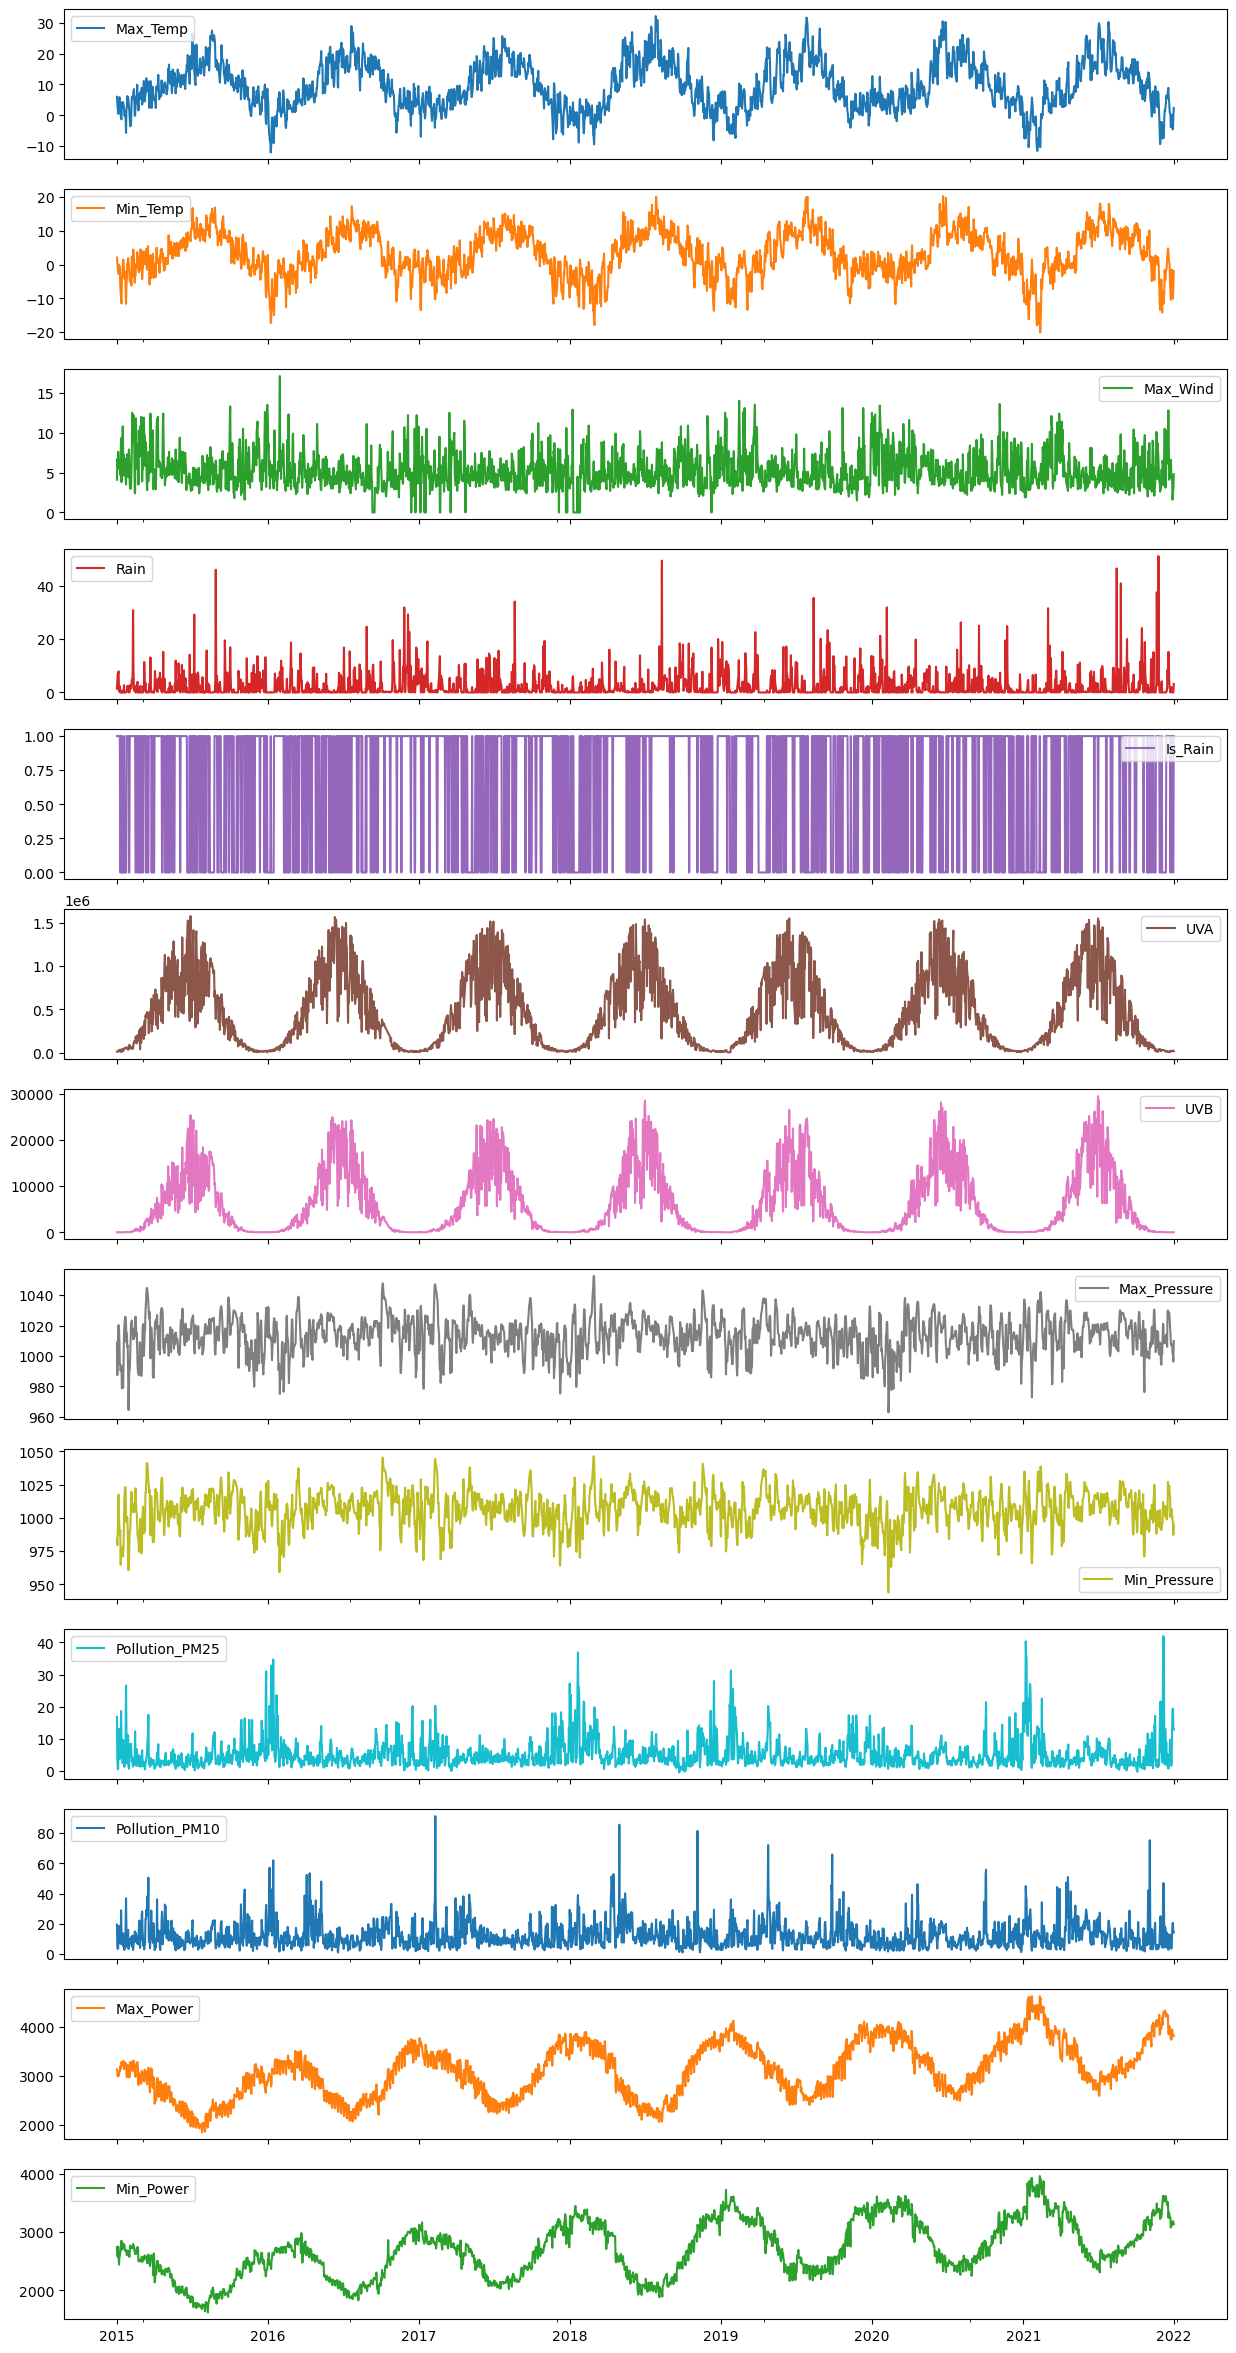

In [558]:
weather_power.plot(subplots = True, figsize=(15,30))
plt.show()

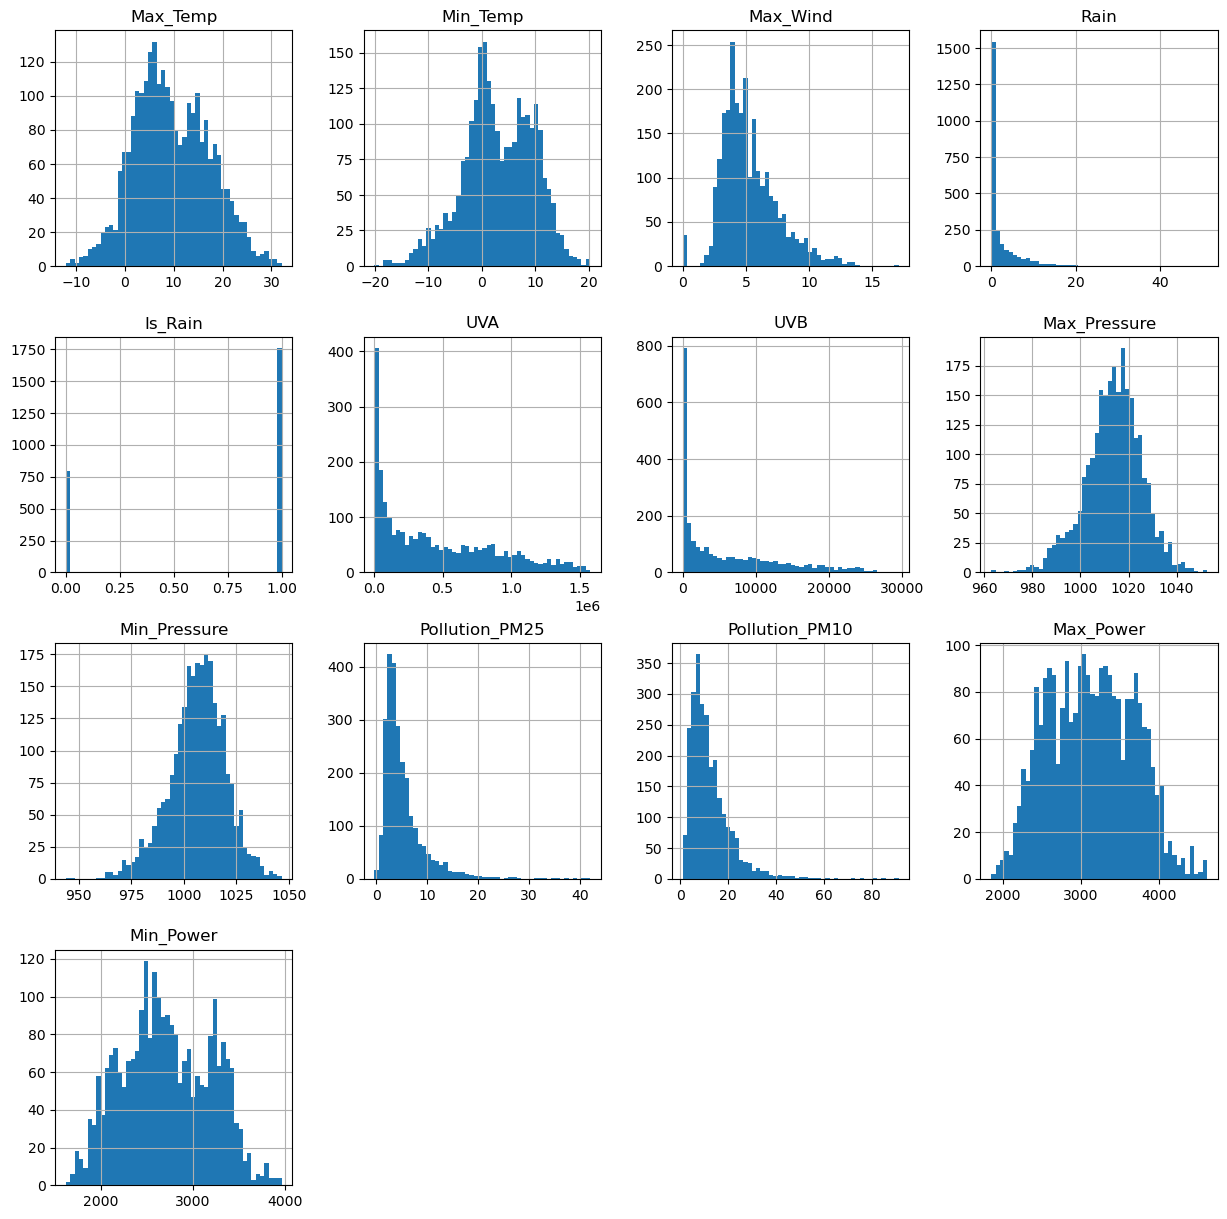

In [559]:
weather_power.hist(bins=50, figsize=(15,15))
plt.show()

In [560]:
weather_power.Pollution_PM10.where(weather_power.Pollution_PM10>50).sort_values(ascending=False).head(17)

2017-02-09    91.250005
2018-04-30    85.571233
2018-11-05    81.436170
2021-11-03    75.269673
2019-04-25    72.108251
2019-09-27    65.834444
2016-01-14    62.022458
2016-01-05    57.150666
2020-10-03    55.797206
2016-04-11    53.456952
2020-10-02    53.242974
2018-04-16    52.881548
2016-04-04    52.330207
2018-04-11    51.291155
2021-04-19    50.960609
2015-03-18    50.566502
2015-01-01          NaN
Name: Pollution_PM10, dtype: float64

In [561]:
weather_power.describe().transpose()

count           mean            std         min  \
Max_Temp        2557.0       9.636840       7.696523   -12.00000   
Min_Temp        2557.0       3.079937       6.585082   -20.10000   
Max_Wind        2557.0       5.286117       2.227827     0.00000   
Rain            2557.0       2.453109       4.634751     0.00000   
Is_Rain         2557.0       0.688698       0.463117     0.00000   
UVA             2557.0  461903.896402  419709.313856  3683.10000   
UVB             2557.0    6067.404159    6915.824940   -20.35200   
Max_Pressure    2557.0    1013.730583      11.677193   962.90000   
Min_Pressure    2557.0    1006.403989      13.358389   944.00000   
Pollution_PM25  2557.0       5.303824       4.427758    -0.39186   
Pollution_PM10  2557.0      12.392685       8.732117     1.09158   
Max_Power       2557.0    3136.133750     547.332617  1854.00000   
Min_Power       2557.0    2710.414548     477.499468  1620.00000   

                         25%            50%            75%           max  
Max_Temp            4.000000       8.800000      15.200000  3.210000e+01  
Min_Temp           -1.100000       2.800000       8.300000  2.030000e+01  
Max_Wind            3.800000       4.800000       6.400000  1.710000e+01  
Rain                0.000000       0.400000       2.900000  5.100000e+01  
Is_Rain             0.000000       1.000000       1.000000  1.000000e+00  
UVA             77954.000000  347970.000000  772490.000000  1.575500e+06  
UVB               303.030000    3126.500000   10185.000000  2.947300e+04  
Max_Pressure     1007.000000    1014.300000    1021.300000  1.052600e+03  
Min_Pressure      998.800000    1007.300000    1015.000000  1.046500e+03  
Pollution_PM25      2.613866       3.984580       6.313460  4.197452e+01  
Pollution_PM10      6.593005      10.157918      15.754641  9.125000e+01  
Max_Power        2680.000000    3130.000000    3578.000000  4.618000e+03  
Min_Power        2357.000000    2671.000000    3109.000000  3.965000e+03

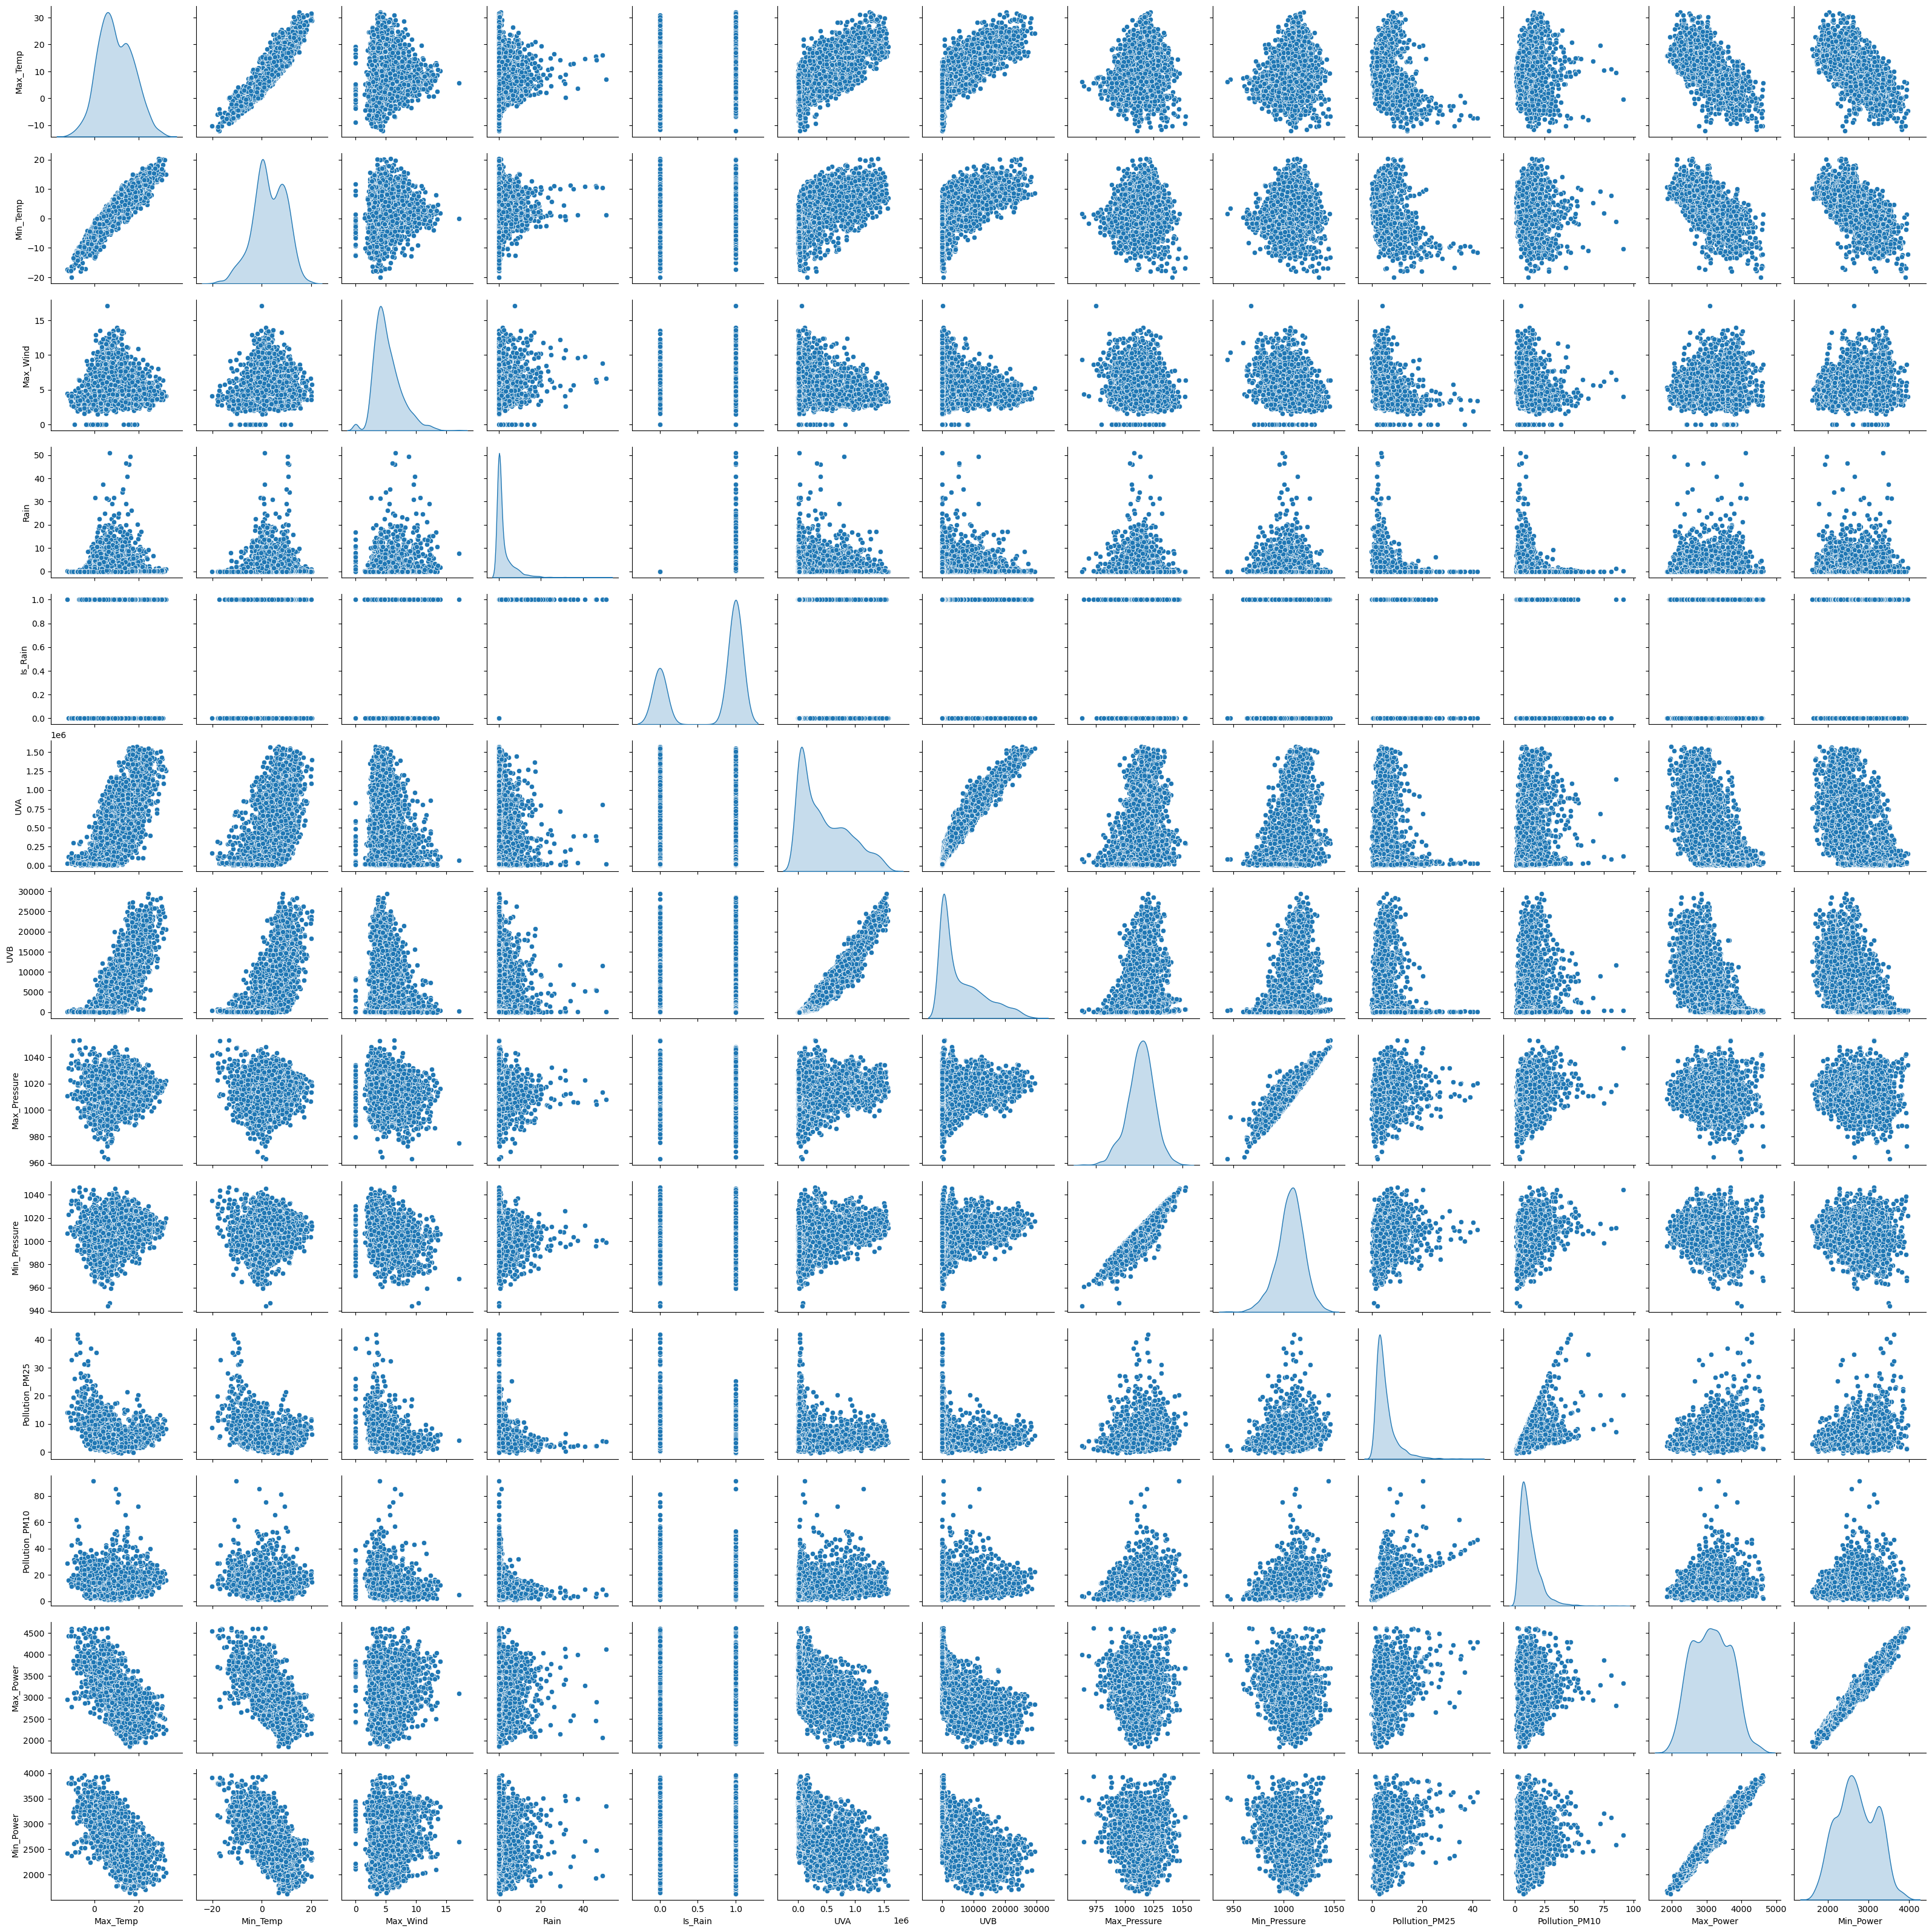

In [562]:
sns.pairplot(weather_power, diag_kind='kde')
plt.show()

## 7. Kilder
UV-data hentet fra: https://github.com/uvnrpa/Daily_Doses \
Takk til DSA, NILU og UIO som tilbyr dette gratis. 

## 8. Word Count

In [563]:
import json

with open('Prosjektoppgave.ipynb') as json_file:
    data = json.load(json_file)

wordCount = 0
for each in data['cells']:
    cellType = each['cell_type']
    if cellType == "markdown":
        content = each['source']
        for line in content:
            temp = [word for word in line.split() if "#" not in word] 
            wordCount = wordCount + len(temp)
            
print("Antall ord ekskludert kodeblokker:", wordCount)

Antall ord ekskludert kodeblokker: 225
